In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
from scipy.stats import binned_statistic_2d, binned_statistic

In [2]:
def StellarDensity2D(x,y,weights,minMax=None,statistic='sum',npix = [250,250],style='SB'):
    if minMax==None: minMax=[ min([min(x),min(y)]),max([max(x),max(y)]) ]
        
    grid, _x, _y, _ = binned_statistic_2d(x, y, weights, statistic, bins=npix)#, range=[minMax,minMax])
    box=np.abs(_x[1]-_x[0])#k['box']
    #minMax = [0, 1]
    
    if style=='normal': return grid,box
    if statistic=='sum':
        
        if style=='SB':
            #box_arcsec = np.rad2deg(np.arctan(box*1000/10))*(60*60)
            box_arcsec = (box*1000/10)*((180*60*60)/np.pi)
            return grid / box_arcsec**2,_x,_y,box
        if style=='SD':
            return grid / box**2,_x,_y,box
    if statistic!='sum':
        print('statistic i not sum')
        raise SystemExit

In [3]:
ls /virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/

snapshot_063.0.hdf5*   snapshot_063.1.hdf5*   snapshot_063.2.hdf5*
snapshot_063.10.hdf5*  snapshot_063.20.hdf5*  snapshot_063.30.hdf5*
snapshot_063.11.hdf5*  snapshot_063.21.hdf5*  snapshot_063.31.hdf5*
snapshot_063.12.hdf5*  snapshot_063.22.hdf5*  snapshot_063.3.hdf5*
snapshot_063.13.hdf5*  snapshot_063.23.hdf5*  snapshot_063.4.hdf5*
snapshot_063.14.hdf5*  snapshot_063.24.hdf5*  snapshot_063.5.hdf5*
snapshot_063.15.hdf5*  snapshot_063.25.hdf5*  snapshot_063.6.hdf5*
snapshot_063.16.hdf5*  snapshot_063.26.hdf5*  snapshot_063.7.hdf5*
snapshot_063.17.hdf5*  snapshot_063.27.hdf5*  snapshot_063.8.hdf5*
snapshot_063.18.hdf5*  snapshot_063.28.hdf5*  snapshot_063.9.hdf5*
snapshot_063.19.hdf5*  snapshot_063.29.hdf5*


In [4]:
path = lambda i,j,k: '/virgo/simulations/Auriga/level3_MHD/halo_'+str(i)+'/output/snapdir_'+'%.3i'% j+'/snapshot_'+'%.3i'% j+'.'+str(k)+'.hdf5'
obj = np.arange(0,8,1)

In [5]:
print('%.3i'% 20)

020


In [6]:
X,Y,Z,M = np.array([]),np.array([]),np.array([]),np.array([])
X2,Y2,Z2,M2 = np.array([]),np.array([]),np.array([]),np.array([])
nhalo=21
nsnap= 63
for s in range(0,32):
    print(path(nhalo,nsnap,s))
    part= h5py.File(path(nhalo,nsnap,s),'r')
    #print(part['PartType2'].keys())
    #print(part['PartType2/Coordinates'].shape)
    dat1 = part['PartType1']
    dat = part['PartType2']
    print(part['PartType1'].keys())
    print(part['PartType2'].keys())

    
    x = dat1['Coordinates'][:,0]#/h
    y = dat1['Coordinates'][:,1]#/h
    z = dat1['Coordinates'][:,2]#/h
    #m = dat1['Masses'][()]*1e10#/h
    
    X = np.concatenate([X,x])
    Y = np.concatenate([Y,y])
    Z = np.concatenate([Z,z])
    #M = np.concatenate([M,m])
    
    x = dat['Coordinates'][:,0]#/h
    y = dat['Coordinates'][:,1]#/h
    z = dat['Coordinates'][:,2]#/h
    m = dat['Masses'][()]*1e10#/h
    
    X2 = np.concatenate([X2,x])
    Y2 = np.concatenate([Y2,y])
    Z2 = np.concatenate([Z2,z])
    M2 = np.concatenate([M2,m])
    


/virgo/simulations/Auriga/level3_MHD/halo_21/output/snapdir_063/snapshot_063.0.hdf5
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'Velocities']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
/virgo/simulations/Auriga/level3_MHD/halo_21/output/snapdir_063/snapshot_063.1.hdf5
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'Velocities']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
/virgo/simulations/Auriga/level3_MHD/halo_21/output/snapdir_063/snapshot_063.2.hdf5
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'Velocities']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
/virgo/simulations/Auriga/level3_MHD/halo_21/output/snapdir_063/snapshot_063.3.hdf5
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'Velocities']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
/virgo/simulations/Auriga/level3_MHD/hal

In [7]:
#X,Y,Z=X-X[0],Y-Y[0],Z-Z[0]


In [8]:
print(X.shape,Y.shape,M.shape)
print(X2.shape,Y2.shape,M2.shape)

(185049914,) (185049914,) (0,)
(796154,) (796154,) (796154,)


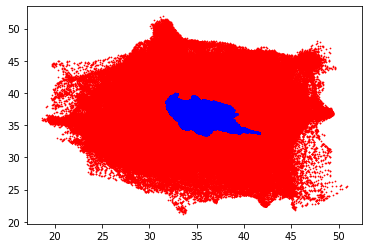

In [9]:
#sel=(-0.05<=X)&(0.05>=X)&(-0.05<=Y)&(0.05>=Y)&(-0.05<=Z)&(0.05>=Z)

plt.scatter(X2,Y2,marker='o',s=0.5,c='r')
plt.scatter(X,Y,s=0.5,marker='o',c='b')

In [10]:
H,_x,_y,box = StellarDensity2D(X,Y,np.ones_like(X),npix = [700,700],style='SD')

/tmp/ipykernel_17892/4073623262.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')


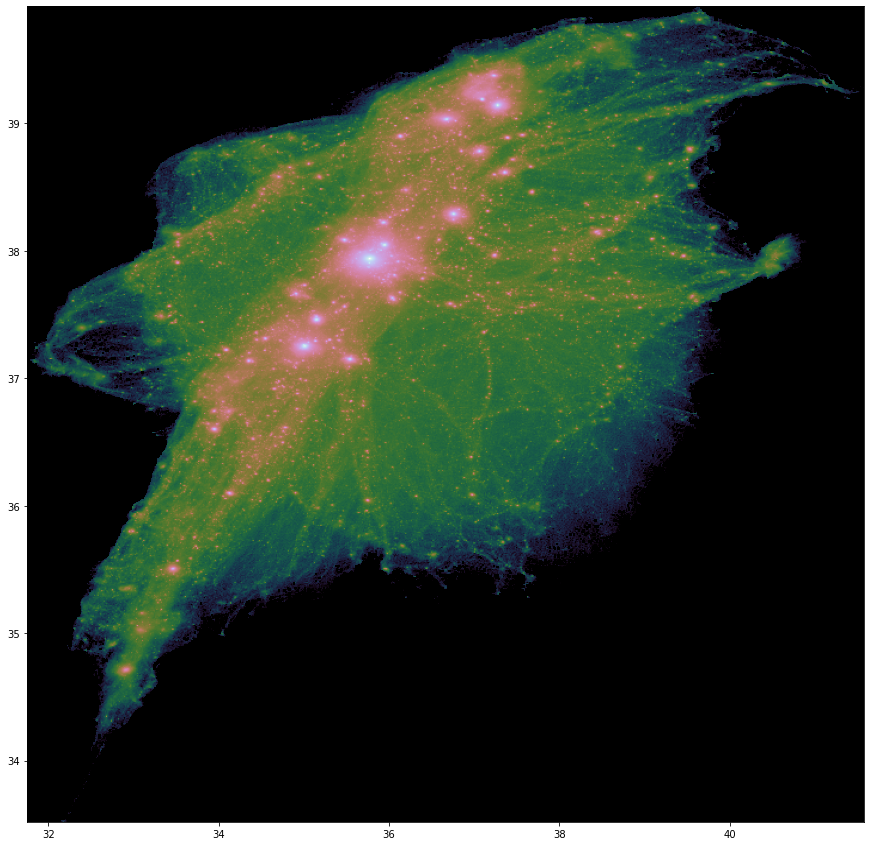

In [11]:
ax1=plt.figure(figsize=(15,15))
ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
extent = _x.min(),_x.max(),_y.min(),_y.max()
plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')
#plt.scatter(X[0],Y[0],marker='o',s=50)

In [12]:
H_,x_,y_,box = StellarDensity2D(X2,Y2,M2,npix = [400,400],style='SD')



/tmp/ipykernel_17892/1395748036.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H_),cmap='cubehelix',extent=extent_,aspect='auto')


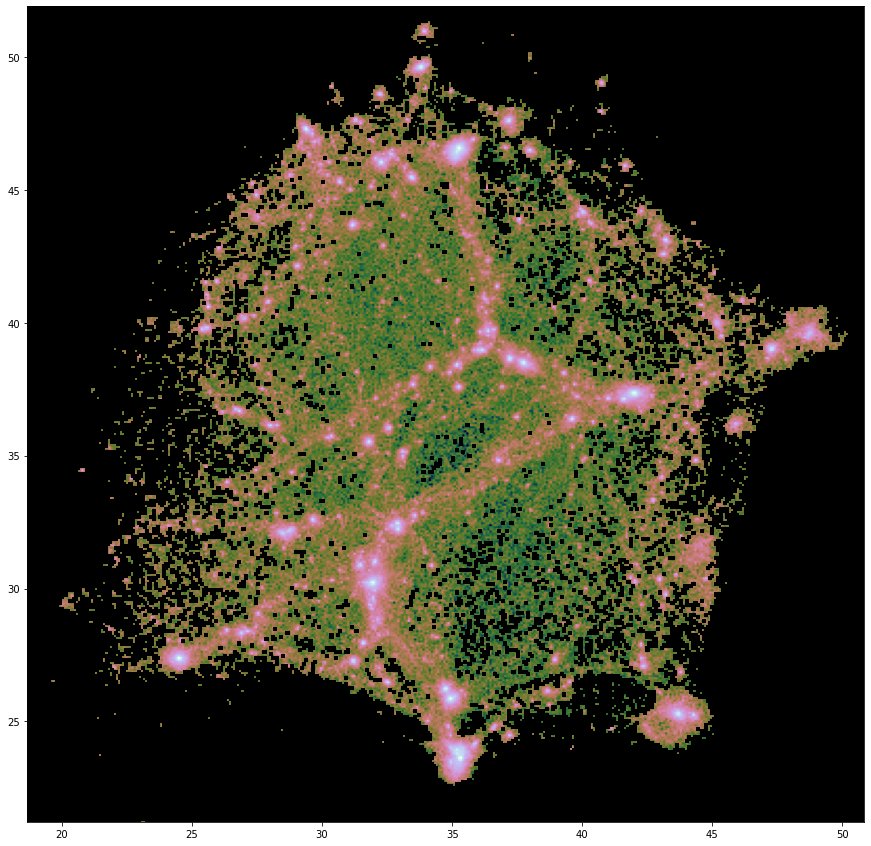

In [13]:
ax1=plt.figure(figsize=(15,15))

ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
#ax1.set_facecolor((0, 0, 0))
extent_ = x_.min(),x_.max(),y_.min(),y_.max()

plt.imshow(np.log10(H_),cmap='cubehelix',extent=extent_,aspect='auto')
#plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')
#plt.scatter(X[0],Y[0],marker='o',s=50)

/tmp/ipykernel_17892/171727499.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H_),cmap='cubehelix',extent=extent_,aspect='auto')
/tmp/ipykernel_17892/171727499.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto',alpha=0.9)


(21.2188663482666, 51.912845611572266)

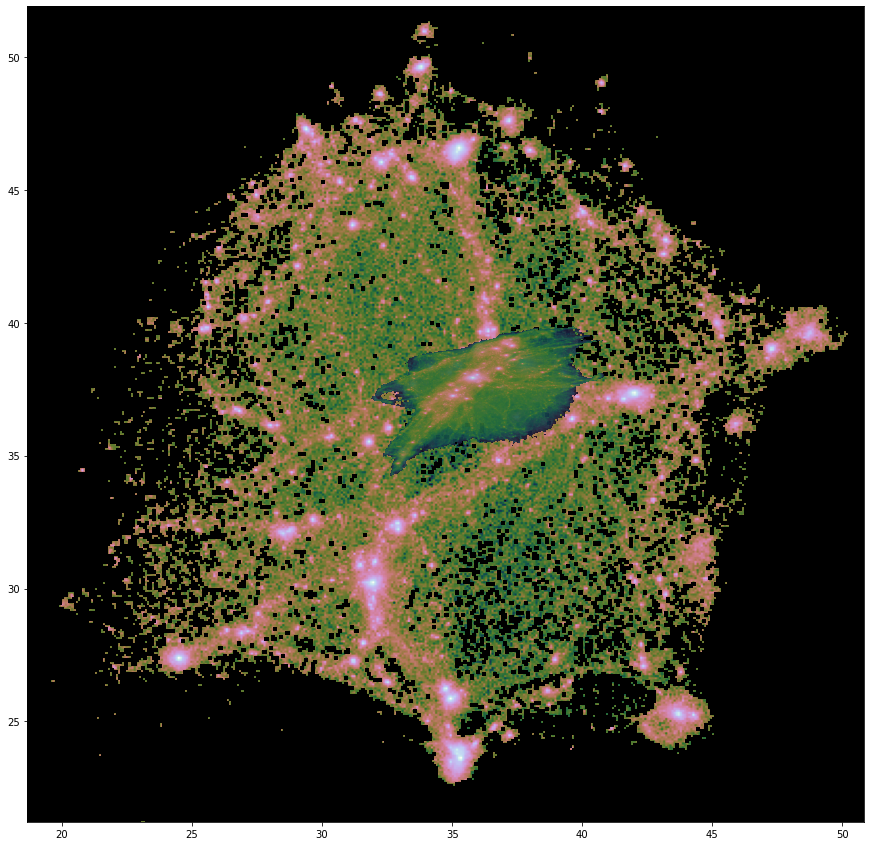

In [14]:
ax1=plt.figure(figsize=(15,15))

ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
#ax1.set_facecolor((0, 0, 0))
extent_ = x_.min(),x_.max(),y_.min(),y_.max()

plt.imshow(np.log10(H_),cmap='cubehelix',extent=extent_,aspect='auto')
plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto',alpha=0.9)
plt.xlim(x_.min(),x_.max())
plt.ylim(y_.min(),y_.max())

In [15]:
import LibAu as la

In [16]:
nhalo=21
nsnap= 63
sim = la.Reader_Au(Nhalo=nhalo,Nsnap=nsnap)

/virgo/simulations/Auriga/level3_MHD/halo_21/output/


AttributeError: 'Dataset' object has no attribute 'value'

In [ ]:
del la